In [104]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [105]:
sgr_data = pd.read_csv(r'C:/Users/olubl/OneDrive/College/Data+/DPS-Planning/sgr_htype_reg.csv')
sgr_data = sgr_data.drop([0,1,2,3])
sgr_data = sgr_data.dropna()
sgr_data = sgr_data[['housing_type','region','parcel_ct','sgr_dps_avg_k12']]
sgr_data['sgr_dps_avg_k12'] = sgr_data['sgr_dps_avg_k12'].round(4)
sgr_data['region'].unique()

array(['Central', 'East', 'North', 'Southeast', 'Southwest'], dtype=object)

In [106]:
#read in shapefile to get geometries for regions
regions=gpd.read_file(r'C:/Users/olubl/OneDrive/College/Data+/DPS-Planning/DPS_Regions.zip')
regions=regions[['ShortName','geometry']]
regions.columns=['region','geometry']
regions['region'].unique()

array(['Riverside', 'Southern School of Energy and Sustainability',
       'Northern', 'Jordan', 'Hillside'], dtype=object)

In [107]:
#rename schools to regions in order to merge dfs
regions['region'] = regions['region'].replace({
    'Jordan': 'Southwest',
    'Southern School of Energy and Sustainability': 'East',
    'Northern': 'North',
    'Riverside': 'Central',
    'Hillside': 'Southeast'
})
regions

,region,geometry
0,Central,"POLYGON ((-8.78e+06 4.3e+06, -8.78e+06 4.3e+06..."
1,East,"POLYGON ((-8.77e+06 4.3e+06, -8.77e+06 4.3e+06..."
2,North,"POLYGON ((-8.79e+06 4.33e+06, -8.78e+06 4.33e+..."
3,Southwest,"POLYGON ((-8.79e+06 4.3e+06, -8.79e+06 4.3e+06..."
4,Southeast,"POLYGON ((-8.78e+06 4.3e+06, -8.78e+06 4.3e+06..."


In [108]:
sgr_data = sgr_data.merge(regions, on='region')

In [109]:
#use dictionaries to break down dataframe by region/housing type
sgr_reg = {
    reg:sgr_data[sgr_data['region']==reg]
    for reg in sgr_data['region'].unique()
}
sgr_housing_type = {
    parcel:sgr_data[sgr_data['housing_type']==parcel]
    for parcel in sgr_data['housing_type'].unique()
}

In [122]:
detach = sgr_housing_type['sf_detach']
detach = gpd.GeoDataFrame(detach, geometry = 'geometry')
detach

,housing_type,region,parcel_ct,sgr_dps_avg_k12,geometry
7,sf_detach,Central,8974,0.2622,"POLYGON ((-8.78e+06 4.3e+06, -8.78e+06 4.3e+06..."
16,sf_detach,East,18865,0.2184,"POLYGON ((-8.77e+06 4.3e+06, -8.77e+06 4.3e+06..."
25,sf_detach,North,19955,0.2687,"POLYGON ((-8.79e+06 4.33e+06, -8.78e+06 4.33e+..."
34,sf_detach,Southeast,12904,0.2150,"POLYGON ((-8.78e+06 4.3e+06, -8.78e+06 4.3e+06..."
43,sf_detach,Southwest,18056,0.2364,"POLYGON ((-8.79e+06 4.3e+06, -8.79e+06 4.3e+06..."


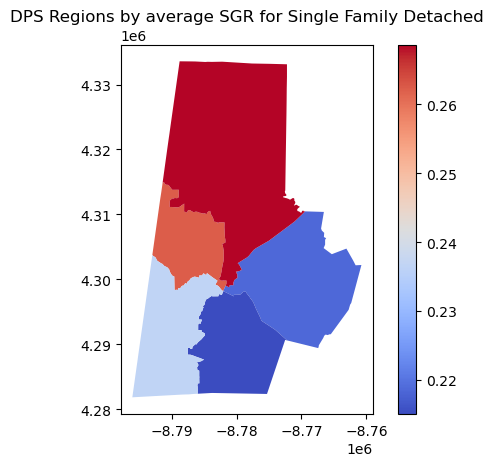

In [127]:
column = 'sgr_dps_avg_k12'
vmin = detach[column].min
vmax = detach[column].max

detach.plot(
    column = column,
    cmap = 'coolwarm',
    legend = True
)
plt.title('DPS Regions by average SGR for Single Family Detached')
plt.show()